<a href="https://colab.research.google.com/github/lblum95/AML/blob/master/task2/Jannik_classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2

## Import data

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive')

Mounted at /content/drive


## Pre-process data

### Import libraries

In [2]:
%matplotlib inline 

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import umap
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Import data

In [4]:
x_train = pd.read_csv("data/X_train.csv",index_col=0,header = 0)
y_train = pd.read_csv("data/y_train.csv",index_col=0,header = 0)
x_test = pd.read_csv("data/X_test.csv",index_col=0,header = 0)

### Preprocess data

In [5]:
y_first=y_train['y'].replace(2,0)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# First classification

## Feature selection

### Amount of good features

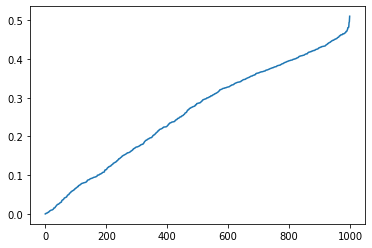

In [6]:
p=[]
for i in range(x_train.shape[1]):
  p.append(abs(stats.pearsonr(x_train[:,i], y_first)[0]))
p.sort()
plt.plot(p)
plt.show()

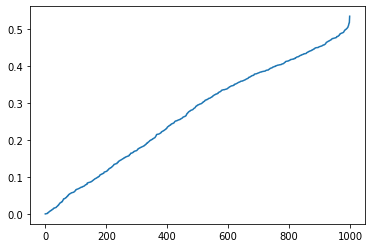

In [7]:
p=[]
for i in range(x_train.shape[1]):
  p.append(abs(stats.spearmanr(x_train[:,i], y_first)[0]))
p.sort()
plt.plot(p)
plt.show()

In [8]:
q=[value for value in p if value>0.45]
len(q)

106

### Import libraries

In [9]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

### Feature selection

In [10]:
kbest = SelectKBest(f_classif,k=106).fit(x_train,y_first)
X_train = kbest.transform(x_train)
X_test = kbest.transform(x_test)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_first, test_size=0.2, random_state=36)

## SVC

{'C': 1, 'kernel': 'rbf'}


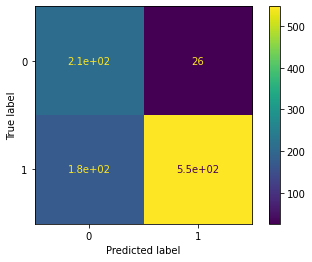

In [12]:
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1, 1, 10, 100]}

svc = SVC(class_weight='balanced',decision_function_shape='ovo', random_state=36)
clf1 = GridSearchCV(estimator=svc, param_grid=parameters, scoring='balanced_accuracy',return_train_score=True)
clf1.fit(X_train, y_train)
print(clf1.best_params_)
plot_confusion_matrix(clf1, X_val, y_val)
plt.show() 

## Decision tree

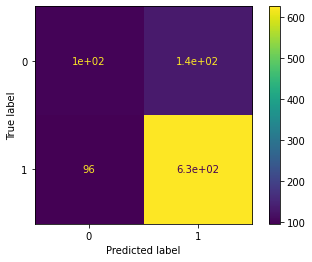

In [13]:
tree = DecisionTreeClassifier(class_weight='balanced', random_state=36)
tree.fit(X_train, y_train)
plot_confusion_matrix(tree, X_val, y_val)
plt.show() 

In [14]:
tree.score(X_val,y_val)

0.759375

## Nearest Neighbor

{'n_neighbors': 5}


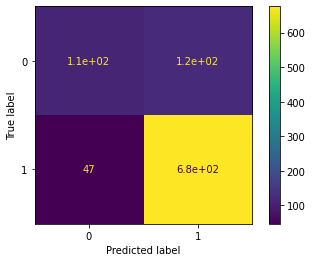

In [15]:
parameters = {'n_neighbors':[1, 3, 5]}
neigh = KNeighborsClassifier(n_neighbors=3)
clf = GridSearchCV(estimator=neigh, param_grid=parameters, scoring='balanced_accuracy',return_train_score=True)
clf.fit(X_train, y_train)
print(clf.best_params_)
plot_confusion_matrix(clf, X_val, y_val)
plt.show() 

## Naive Bayes

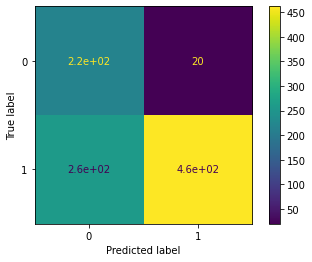

In [16]:
from sklearn.naive_bayes import GaussianNB

gauss = GaussianNB(priors=[1/4,3/4])
gauss.fit(X_train, y_train)
plot_confusion_matrix(gauss, X_val, y_val)
plt.show() 

## Gaussian Process

{'n_neighbors': 5}


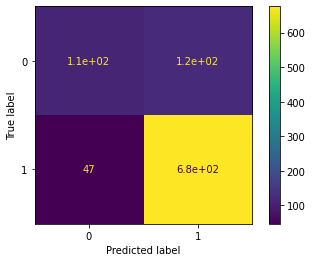

In [17]:
from sklearn.gaussian_process.kernels import WhiteKernel, RBF, Matern, ExpSineSquared, RationalQuadratic
from sklearn.gaussian_process import GaussianProcessClassifier

parameters = {'kernel':[WhiteKernel, RBF, Matern, ExpSineSquared, RationalQuadratic]}
proc = GaussianProcessClassifier(random_state=36)
proc = GridSearchCV(estimator=proc, param_grid=parameters, scoring='balanced_accuracy',return_train_score=True)
clf.fit(X_train, y_train)
print(clf.best_params_)
plot_confusion_matrix(clf, X_val, y_val)
plt.show() 

# Second classification

### Generate dataset with first classification

In [18]:
y_train = pd.read_csv("data/y_train.csv",index_col=0,header = 0)
y_train['first']=y_train['y'].replace(2,0)
X_first, X_second, y_first, y_second = train_test_split(
    x_train, y_train, test_size=0.5, random_state=36)
X_first = kbest.transform(X_first)
X_second_pred=kbest.transform(X_second)

Put in best params for SVC

In [19]:
svc2 = SVC(C=1, kernel='rbf',class_weight='balanced',decision_function_shape='ovo', random_state=36)
svc2.fit(X_first, y_first['first'])
labels=svc2.predict(X_second_pred)

In [20]:
X_second=X_second[labels == 0]
y_second=y_second[labels == 0]

## Feature selection

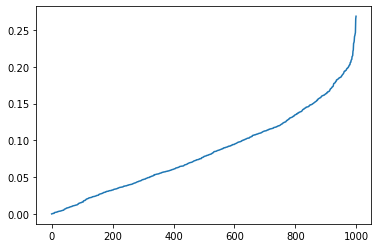

In [21]:
p=[]
for i in range(X_second.shape[1]):
  p.append(abs(stats.pearsonr(X_second[:,i], y_second['y'])[0]))
p.sort()
plt.plot(p)
plt.show()

In [22]:
q=[value for value in p if value>0.15]
len(q)

141

In [23]:
kbest = SelectKBest(f_classif,k=len(q)).fit(X_second,y_second['y'])
X_second = kbest.transform(X_second)

In [24]:
X_second_train, X_second_val, y_second_train, y_second_val = train_test_split(
    X_second, y_second['y'], test_size=0.2, random_state=36)

## Training

### SVC

{'C': 1, 'kernel': 'rbf'}


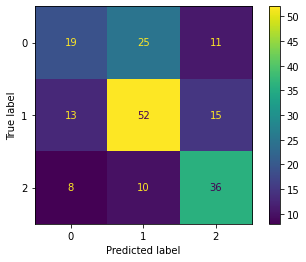

In [25]:
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1, 1, 10, 100]}

svc = SVC(class_weight='balanced',decision_function_shape='ovo', random_state=36)
clf2 = GridSearchCV(estimator=svc, param_grid=parameters, scoring='balanced_accuracy',return_train_score=True)
clf2.fit(X_second_train, y_second_train)
print(clf1.best_params_)
plot_confusion_matrix(clf2, X_second_val, y_second_val)
plt.show() 

### KNN

{'n_neighbors': 3}


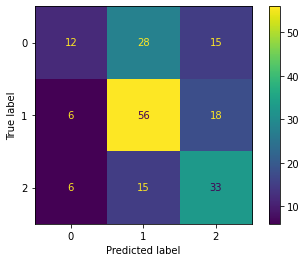

In [26]:
parameters = {'n_neighbors':[1, 3, 5]}
neigh = KNeighborsClassifier()
clf_nn = GridSearchCV(estimator=neigh, param_grid=parameters, scoring='balanced_accuracy',return_train_score=True)
clf_nn.fit(X_second_train, y_second_train)
print(clf_nn.best_params_)
plot_confusion_matrix(clf_nn, X_second_val, y_second_val)
plt.show() 

### Decision Tree

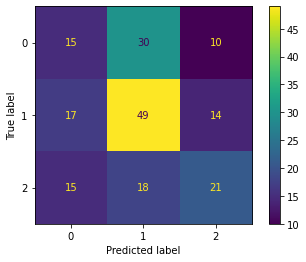

In [27]:
tree = DecisionTreeClassifier(class_weight='balanced', random_state=36)
tree.fit(X_second_train, y_second_train)
plot_confusion_matrix(tree, X_second_val, y_second_val)
plt.show() 